In [2]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("1991.xlsx")
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1991,17996,85,37,3534
1,1991,17772,307,15,3527
2,1991,17293,79,41,3527
3,1991,17151,143,17,3518
4,1991,18067,189,40,3510
...,...,...,...,...,...
1718,1991,17330,306,31,3552
1719,1991,17728,204,22,3534
1720,1991,17951,118,21,3532
1721,1991,17359,21,42,3546


In [4]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1723, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1723 non-null   int64
 1   Maximum length (m))  1723 non-null   int64
 2   Recession(m),        1723 non-null   int64
 3   Rate/yr(m)           1723 non-null   int64
 4   Snout altitude (m)   1723 non-null   int64
dtypes: int64(5)
memory usage: 67.4 KB


In [6]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [7]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1723


In [8]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [9]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [10]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1991,17996,85,37,3534
1,1991,17772,307,15,3527
2,1991,17293,79,41,3527
3,1991,17151,143,17,3518
4,1991,18067,189,40,3510


In [11]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,0.0066,0.0058,-0.0446
"Recession(m),",NaN,0.0066,1.0000,-0.0110,-0.0361
Rate/yr(m),NaN,0.0058,-0.0110,1.0000,-0.0055
Snout altitude (m),NaN,-0.0446,-0.0361,-0.0055,1.0000


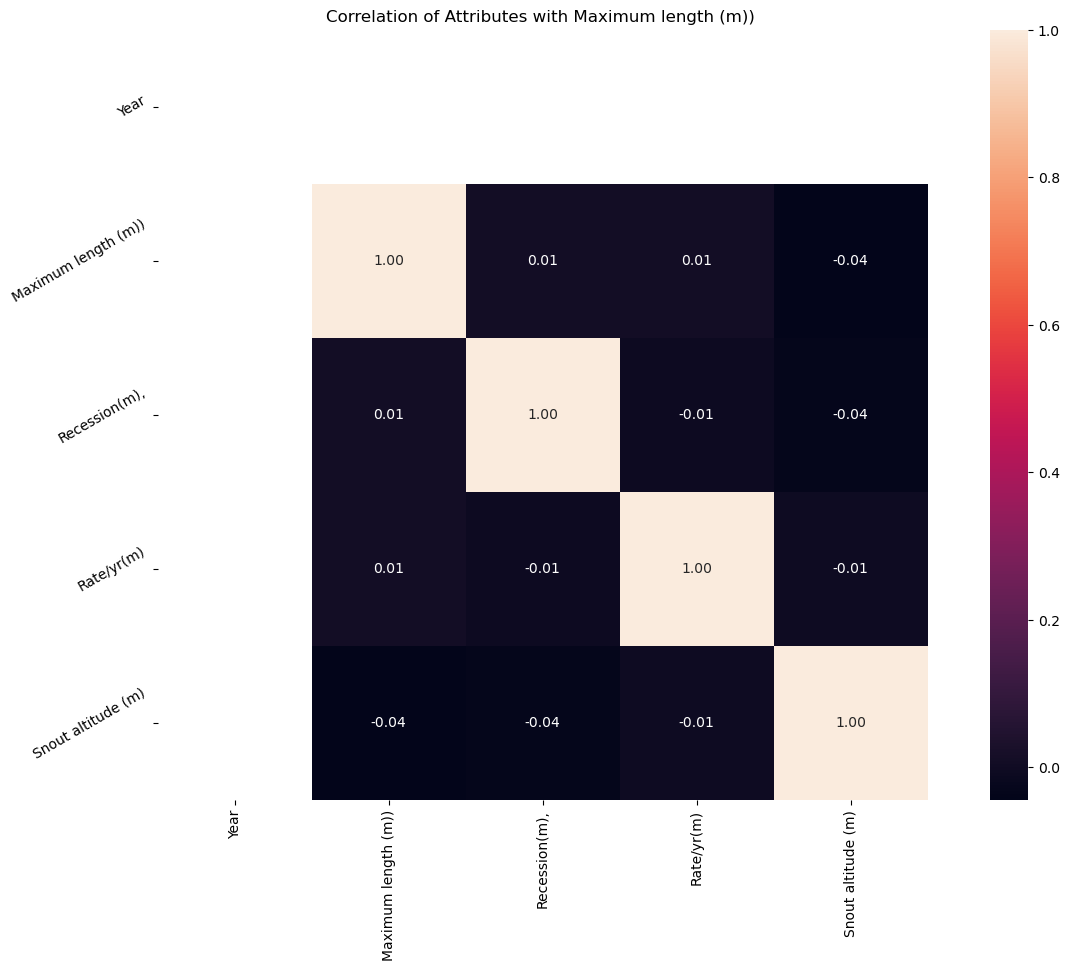

In [12]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [13]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [14]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,723.0000","1,723.0000","1,723.0000","1,723.0000","1,723.0000"
mean,"1,991.0000","17,533.8920",216.7916,27.5421,"3,533.0377"
std,0.0000,295.2276,126.0802,8.6633,20.3217
min,"1,991.0000","17,036.0000",0.0000,13.0000,"3,496.0000"
25%,"1,991.0000","17,273.0000",109.0000,20.0000,"3,516.0000"
50%,"1,991.0000","17,526.0000",217.0000,28.0000,"3,533.0000"
75%,"1,991.0000","17,780.5000",325.0000,35.0000,"3,551.0000"
max,"1,991.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [15]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

Year
1991   1.0000
Name: count, dtype: float64

Recession(m),
217   0.0058
296   0.0058
62    0.0052
125   0.0052
341   0.0052
       ...  
35    0.0006
209   0.0006
239   0.0006
269   0.0006
235   0.0006
Name: count, Length: 429, dtype: float64

Rate/yr(m)
20   0.0459
15   0.0429
31   0.0400
40   0.0371
35   0.0371
26   0.0366
41   0.0360
34   0.0354
16   0.0348
30   0.0348
27   0.0342
42   0.0342
23   0.0342
14   0.0337
25   0.0331
21   0.0331
28   0.0325
33   0.0319
38   0.0313
37   0.0313
32   0.0308
36   0.0302
17   0.0296
39   0.0290
19   0.0290
24   0.0290
18   0.0290
29   0.0290
22   0.0273
13   0.0267
Name: count, dtype: float64

Snout altitude (m)
3534   0.0232
3558   0.0221
3546   0.0209
3553   0.0203
3543   0.0203
        ...  
3498   0.0099
3529   0.0093
3536   0.0087
3550   0.0075
3496   0.0017
Name: count, Length: 72, dtype: float64



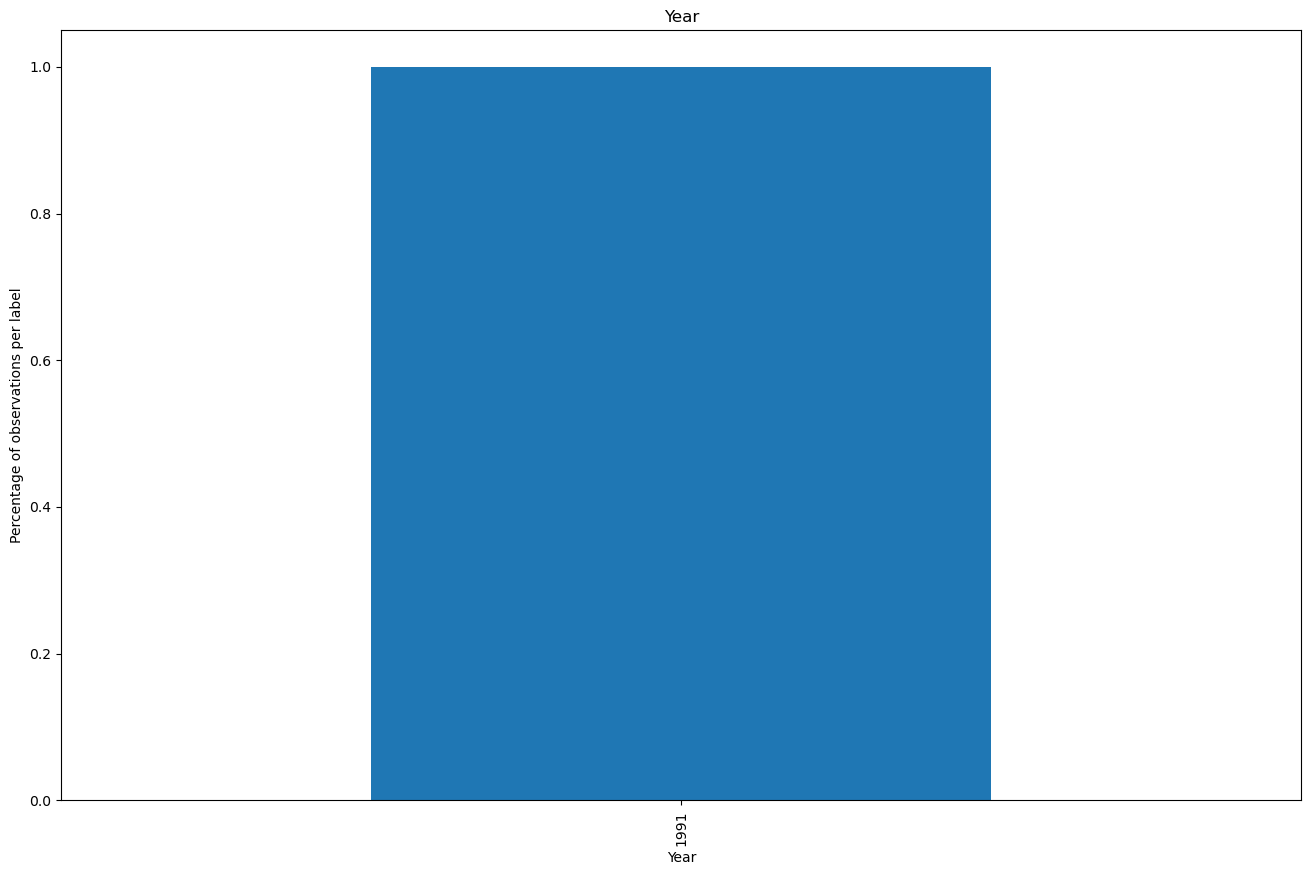

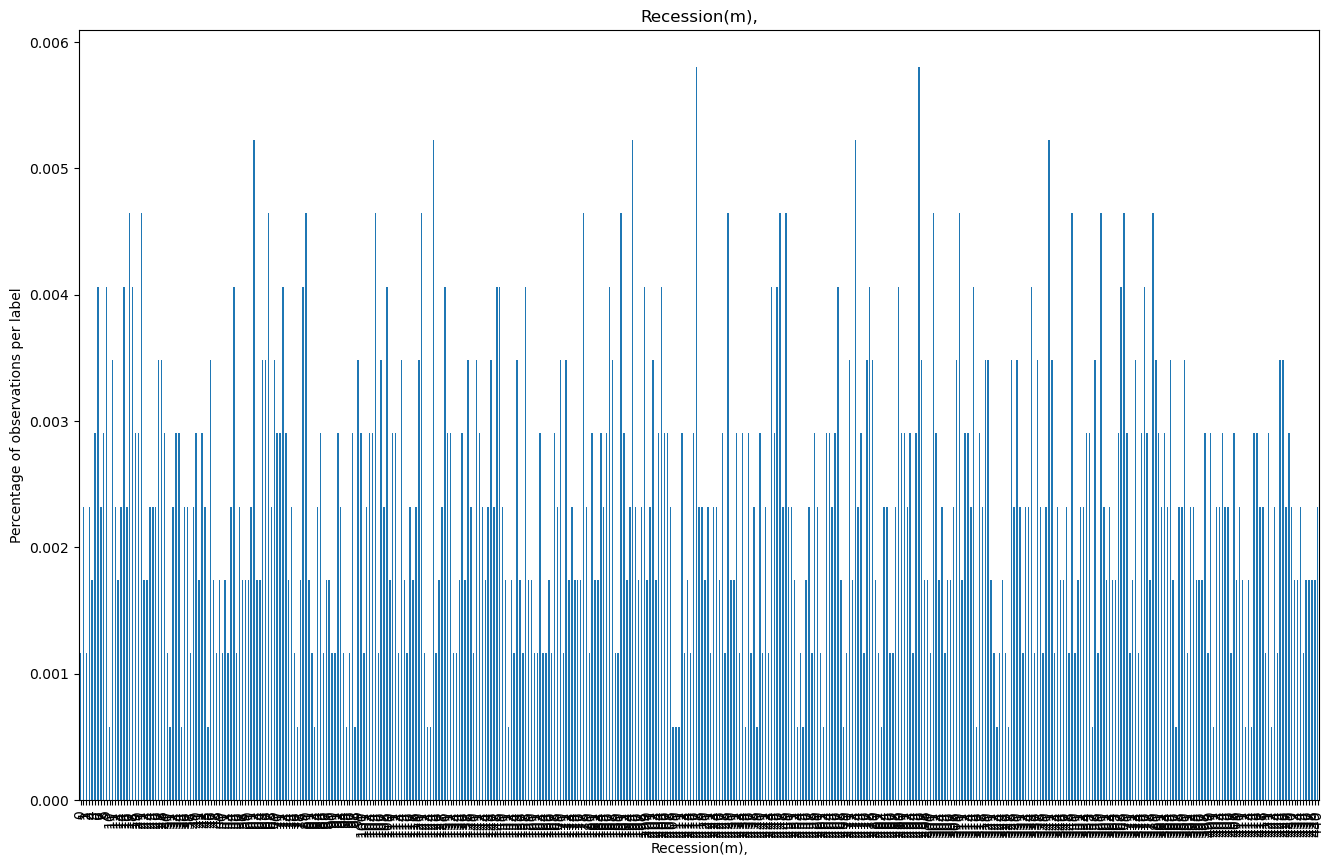

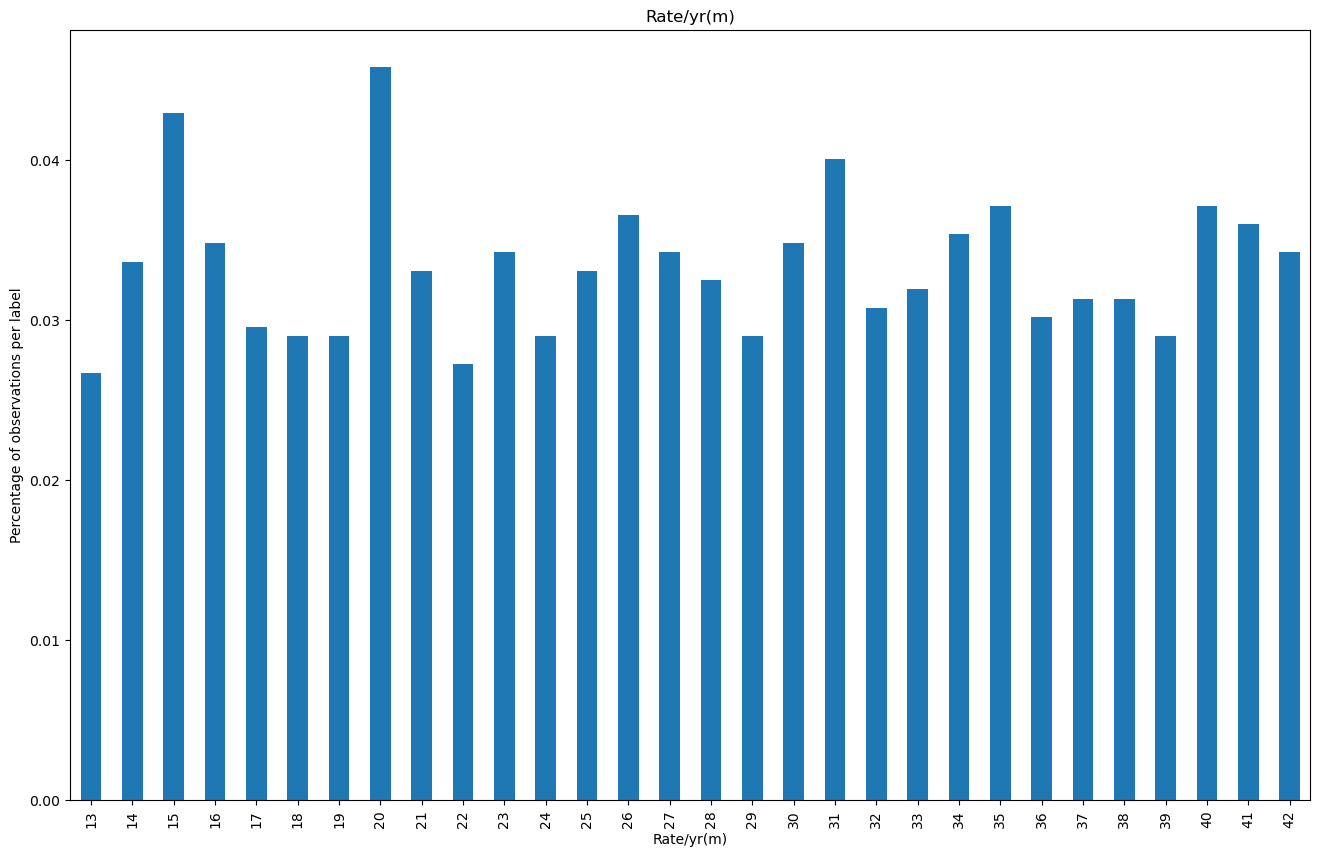

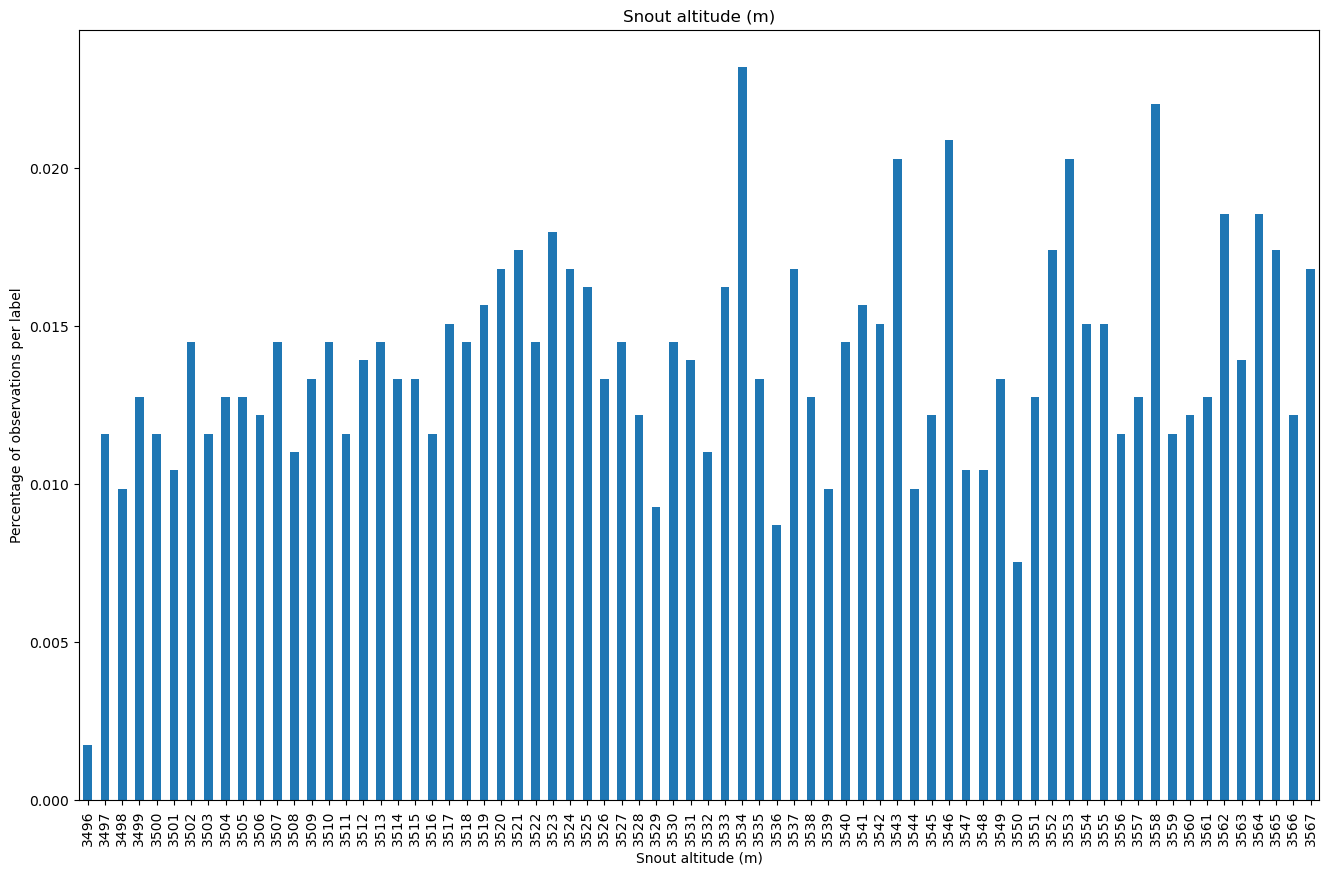

In [16]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()